In [7]:
#I used public data available from the StockX Data Contest, which provided me with a dataset 
#of 99,956 transactions that occurred between 2017 and 2019. This dataset included two prominent 
#brands, Yeezy and Nike Off-White, as well as over 50 different sneaker styles.

#In an effort to enhance the dataset, I manually gathered information on colorways and the number of sales from 
#the StockX website. Subsequently, I converted style and color information into dummy variables. 

#For my modeling purposes, The "price premium" is calculated as the difference between the sale price of a 
#product (in this case, sneakers) and its original retail price. It represents how much more (or less) a 
#customer is willing to pay for a product compared to its original retail price. In other words, it quantifies 
#the additional amount that buyers are willing to spend, or the markup, above the standard retail cost for a 
#particular product.

#The input variables for my analysis included the number of days since  release, sneaker style, colorway, 
#shoe size, and the number of sales. These variables allowed me to develop models and gain insights into 
#the factors influencing sneaker prices in this market.

In [8]:
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt
stockx_data = pd.read_excel("./StockX-Data-Contest-2019.xlsx",sheet_name="Raw Data")
color = pd.read_excel("./supplemental_data_colorway.xlsx",sheet_name="Sheet1")

In [9]:
# --- Data Cleaning ---
# calculate price premium: (sale price - retail price)/retail price
stockx_data["Price_Percentage_change"] = (stockx_data['Sale Price'] - stockx_data['Retail Price'])/stockx_data['Retail Price']

# calculate days since release: order data - release date
stockx_data["Days_Since_Release"] = (pd.to_datetime(stockx_data['Order Date']) - pd.to_datetime(stockx_data['Release Date']))/np.timedelta64('1','D')

# --- style variables ---
# style: v2
stockx_data["yeezy"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Yeezy' in x.split("-") else 0)
# style: airjordan
stockx_data["airjordan"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Jordan' in x.split("-") else 0)
# style: airforce
stockx_data["airforce"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Force' in x.split("-") else 0)
# style: airmax90
stockx_data["airmax90"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if '90' in x.split("-") else 0)
# style: airmax97
stockx_data["airmax97"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if '97' in x.split("-") else 0)
# style: presto
stockx_data["presto"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Presto' in x.split("-") else 0)
# style: vapormax
stockx_data["vapormax"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'VaporMax' in x.split("-") else 0)
# style: blazer
stockx_data["blazer"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Blazer' in x.split("-") else 0)
# style: zoom
stockx_data["zoom"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'Zoom' in x.split("-") else 0)
# style: zoom
stockx_data["react"] = stockx_data['Sneaker Name'].apply(lambda x : 1 if 'React' in x.split("-") else 0)

# --- state variables ---
# creating the california variable
stockx_data["California"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'California' in x else 0)
# creating the new_york variable
stockx_data["New York"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'New York' in x else 0)
# creating the oregon variable
stockx_data["Oregon"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'Oregon' in x else 0)
# creating the florida variable
stockx_data["Florida"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'Florida' in x else 0)
# creating the texas variable
stockx_data["Texas"] = stockx_data["Buyer Region"].apply(lambda x : 1 if 'Texas' in x else 0)
# creating the other_state variable
above5pct_states = ["California", "New York", "Oregon", "Florida", "Texas"]
stockx_data["Other States"] = pd.Series(list(map(int,~stockx_data["Buyer Region"].isin(above5pct_states))))


In [10]:
stockx_data = stockx_data.merge(color, left_on = 'Sneaker Name', right_on = 'Style', how = 'left')

In [11]:
# drop columns that have been coded
# keep retail and sales prices for further analysis
# stockx_data = stockx_data.drop(columns = ['Retail Price','Order Date', 'Brand','Sneaker Name', 'Release Date', 'Buyer Region',
#                                          'Website', 'Product Line', 'Style','weeknum', 'Nike Air Force', 'Adidas Yeezy', 
#                                           'Nike Air Max', 'Nike Zoom','Nike Air VaporMax', 'Nike Blazers', 'Air Jordan', 
#                                           'Nike React','Nike Presto'])
stockx_data = stockx_data.drop(columns = ['Order Date', 'Brand','Sneaker Name', 'Release Date', 'Buyer Region',
                                         'Website', 'Product Line', 'Style'])

In [12]:
# turn all the nan value to the 0
stockx_data = stockx_data.fillna(0)

#### Linear Regression and Comparison to Regularized Models

In [13]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
y = stockx_data["Price_Percentage_change"]
X = sm.add_constant(stockx_data.drop(["Sale Price",'Price_Percentage_change', "Other States", "New York", "Texas"], axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=808)

In [14]:
import statsmodels.api as sm

LinReg = sm.OLS(y_train,X_train)
results = LinReg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Price_Percentage_change   R-squared:                       0.787
Model:                                 OLS   Adj. R-squared:                  0.787
Method:                      Least Squares   F-statistic:                     9178.
Date:                     Thu, 30 Nov 2023   Prob (F-statistic):               0.00
Time:                             21:08:29   Log-Likelihood:                -70786.
No. Observations:                    66970   AIC:                         1.416e+05
Df Residuals:                        66942   BIC:                         1.419e+05
Df Model:                               27                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.4030      0.162     57.907      0.000       9.085       9.721
Retail Price          -0.0500      0.001    -51.322      0.000      -0.052      -0.048
Shoe Size              0.0106      0.001      8.990      0.000       0.008       0.013
Days_Since_Release     0.0004   2.05e-05     20.529      0.000       0.000       0.000
yeezy                  0.9012      0.050     17.989      0.000       0.803       0.999
airjordan              5.2076      0.033    157.582      0.000       5.143       5.272
airforce              -0.6430      0.019    -34.034      0.000      -0.680      -0.606
airmax90              -0.2426      0.030     -8.178      0.000      -0.301      -0.184
airmax97               1.4560      0.031     46.241      0.000       1.394       1.518
presto                 0.7585      0.016     46.768      0.000       0.727       0.790
vapormax               3.0240      0.081     37.347      0.000       2.865       3.183
blazer                -0.5795      0.042    -13.881      0.000      -0.661      -0.498
zoom                  -0.9918      0.019    -51.358      0.000      -1.030      -0.954
react                  0.5125      0.048     10.769      0.000       0.419       0.606
California             0.0598      0.007      8.574      0.000       0.046       0.073
Oregon                 0.0188      0.011      1.776      0.076      -0.002       0.040
Florida                0.0278      0.011      2.489      0.013       0.006       0.050
Black                  1.2057      0.016     75.504      0.000       1.174       1.237
White                  1.4191      0.016     87.122      0.000       1.387       1.451
Grey                   1.0123      0.017     58.760      0.000       0.979       1.046
Red                    2.1219      0.024     86.971      0.000       2.074       2.170
Green                  1.0061      0.063     16.053      0.000       0.883       1.129
Neo                    0.9287      0.019     48.910      0.000       0.891       0.966
Orange                 1.8837      0.028     67.790      0.000       1.829       1.938
Tan/Brown              2.4041      0.042     57.525      0.000       2.322       2.486
Pink                   1.0070      0.028     36.468      0.000       0.953       1.061
Blue                  -2.1584      0.028    -77.782      0.000      -2.213      -2.104
Colorful              -0.7474      0.015    -49.691      0.000      -0.777      -0.718
Number of Sales    -2.482e-05   4.76e-07    -52.095      0.000   -2.58e-05   -2.39e-05
==============================================================================
Omnibus:                    44627.493   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1438998.696
Skew:  

In [15]:
#Normal Linear Regression
y_pred = results.predict(X_test)

RSS = np.sum((y_test - y_pred)**2)
SST = np.sum((y_test - np.mean(y_train))**2)
OSR2 = 1- RSS/SST

from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_pred,y_test))

print(OSR2)
RMSE

0.7924144323328752


0.6861439687082301

In [16]:
#Lasso Regularization
LinRegreg = sm.OLS(y_train,X_train)
results1 = LinRegreg.fit_regularized(L1_wt=1.0)
y_pred1 = results1.predict(X_test)

RSS = np.sum((y_test - y_pred1)**2)
SST = np.sum((y_test - np.mean(y_train))**2)
OSR2 = 1- RSS/SST

from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_pred1,y_test))

print(OSR2)
RMSE

0.7811606808274492


0.7044973270366306

In [17]:
#Ridge Regularization
LinRegreg = sm.OLS(y_train,X_train)
results1 = LinRegreg.fit_regularized(L1_wt=0.0)
y_pred2 = results1.predict(X_test)

RSS = np.sum((y_test - y_pred2)**2)
SST = np.sum((y_test - np.mean(y_train))**2)
OSR2 = 1- RSS/SST

from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_pred2,y_test))

print(OSR2)
RMSE

0.7924144322525373


0.6861439688410029

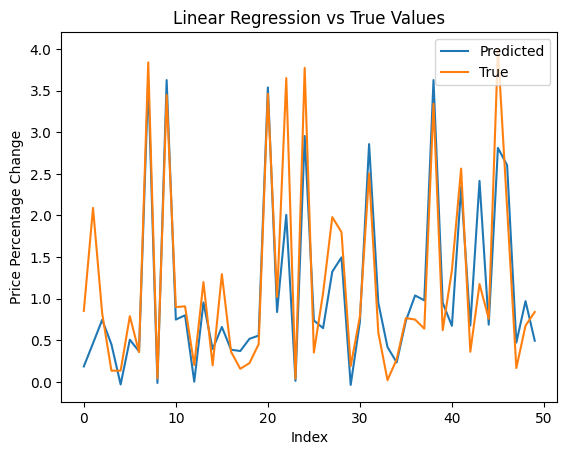

In [18]:
plt.plot(y_pred[0:50].reset_index().drop("index", axis=1),label = "Predicted")
plt.plot(y_test[0:50].reset_index().drop("index", axis=1), label = "True")
plt.title("Linear Regression vs True Values")
plt.xlabel("Index")
plt.ylabel("Price Percentage Change")
plt.legend()